In [1]:
import deeptrack as dt
from deeptrack.models.yolo import utils
import numpy as np
import matplotlib.pyplot as plt

from simulation import *

c:\Users\santh\Desktop\VScode\Particle_Chamber\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
c:\Users\santh\Desktop\VScode\Particle_Chamber\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")


In [6]:
sim= MultiParticle(
    
    
    n_particles = lambda: int(np.random.rand()*10) + 15,
        
    
)
starting_value = dt.Value(lambda: np.ones((IMAGE_SIZE, IMAGE_SIZE)))

sim= starting_value >> MultiParticle(
    n_particles = lambda: int(np.random.rand()*10) + 15,
)

particle =  sim[0]
pos =  sim[1]
rad =  sim[2]






In [7]:
print(np.shape(particle.resolve()))

Image((1, 100, 100))


In [8]:
gradient = dt.IlluminationGradient(
    gradient=[.5e-3, 0e-3],#lambda: 1e-3 + np.random.randn(2) * 1e-3,
)

class Normalize(dt.Feature):
    def __init__(
        self, **kwargs
    ):
        super().__init__( **kwargs)

    def get(self, image, **kwargs):
        image = image / np.max(image)
        return image

normalization = Normalize()

gauss = dt.Gaussian(mu = 0, sigma = .01)

import scipy
#Smoothing
kernel = np.ones((3, 3)) / 15
smoothing = dt.Lambda(lambda: lambda image: scipy.ndimage.filters.convolve(image, kernel)) 

particle = particle  >> gauss >> normalization 

In [9]:
"""def get_label(a, b):
    a = a.resolve()
    b = b.resolve()
    n = int(np.shape(a)[0])
    label = np.zeros((n,4))

    for i in range(n):
        label[i,:] = [int(a[i, 0]), int(a[i, 1]), b[i], b[i]]

    
    return label #(np.asarray(a.resolve()), np.asarray(b.resolve()))"""

def get_label(rad, pos):
    rad = np.array(rad)
    pos = np.array(pos)
        
    n = np.shape(rad)[0]  
    label = np.zeros((n, 4))

    for i in range ( n ):
        label[i, : ] = [int(pos[i, 0]), int(pos[i, 1]), rad[i,0], rad[i,0]]
    
    #print(label)
    return label

In [10]:


label_func = particle >> dt.Lambda(lambda rad, pos: lambda x: get_label(rad, pos), rad=rad, pos=pos)
#bboxes.resolve()
#data = particle & bboxes
#print(data.resolve())


print(label_func.resolve())

Image(array([[41.        ,  2.        ,  2.10333197,  2.10333197],
       [36.        , 77.        ,  2.56323029,  2.56323029],
       [56.        , 99.        ,  2.5260119 ,  2.5260119 ],
       [ 8.        , 52.        ,  2.55458866,  2.55458866],
       [73.        , 36.        ,  2.63030884,  2.63030884],
       [79.        , 12.        ,  2.90381224,  2.90381224],
       [68.        , 28.        ,  2.8661206 ,  2.8661206 ],
       [93.        , 61.        ,  2.7616864 ,  2.7616864 ],
       [73.        , 69.        ,  2.64438701,  2.64438701],
       [45.        , 51.        ,  2.12222826,  2.12222826],
       [48.        , 84.        ,  2.08209118,  2.08209118],
       [84.        , 26.        ,  2.00390691,  2.00390691],
       [28.        , 12.        ,  2.12695196,  2.12695196],
       [29.        , 53.        ,  2.69797906,  2.69797906],
       [23.        , 34.        ,  2.00428783,  2.00428783],
       [92.        , 83.        ,  2.96346805,  2.96346805],
       [87.       

[[77.         58.          2.37945802  2.37945802]
 [27.         34.          2.35790101  2.35790101]
 [69.         58.          2.95093889  2.95093889]
 [86.         70.          2.01527941  2.01527941]
 [29.          5.          2.91390427  2.91390427]
 [21.         73.          2.99550004  2.99550004]
 [ 4.         58.          2.2034803   2.2034803 ]
 [72.         58.          2.39259082  2.39259082]
 [42.         42.          2.67354104  2.67354104]
 [72.         10.          2.12653898  2.12653898]
 [56.         45.          2.22240015  2.22240015]
 [93.         57.          2.44245894  2.44245894]
 [ 3.         47.          2.50251662  2.50251662]
 [23.         58.          2.68153403  2.68153403]
 [32.         34.          2.11787549  2.11787549]
 [35.         24.          2.09531492  2.09531492]
 [46.         60.          2.19427558  2.19427558]
 [57.         85.          2.01634723  2.01634723]
 [66.         66.          2.2422471   2.2422471 ]
 [87.          4.          2.26

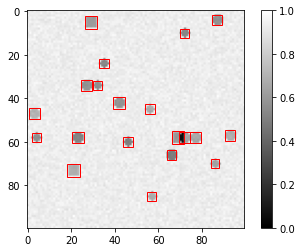

[[22.         76.          2.21177083  2.21177083]
 [20.         12.          2.08151035  2.08151035]
 [75.          2.          2.08793779  2.08793779]
 [ 3.         96.          2.79458353  2.79458353]
 [39.         22.          2.61759138  2.61759138]
 [42.         68.          2.57905585  2.57905585]
 [ 8.         63.          2.67859208  2.67859208]
 [54.         50.          2.10076573  2.10076573]
 [28.         36.          2.68585966  2.68585966]
 [91.         78.          2.70912559  2.70912559]
 [53.         33.          2.7129557   2.7129557 ]
 [42.         33.          2.19247504  2.19247504]
 [27.         63.          2.78417017  2.78417017]
 [ 0.         64.          2.13110334  2.13110334]
 [12.         27.          2.6009507   2.6009507 ]
 [62.         73.          2.71418968  2.71418968]]
Image(array([[22., 76.],
       [20., 12.],
       [75.,  2.],
       [ 3., 96.],
       [39., 22.],
       [42., 68.],
       [ 8., 63.],
       [54., 50.],
       [28., 36.],
      

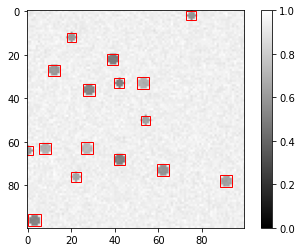

[[49.         28.          2.96553599  2.96553599]
 [69.         92.          2.21901897  2.21901897]
 [96.         43.          2.99594845  2.99594845]
 [74.         63.          2.87570181  2.87570181]
 [10.         31.          2.54687419  2.54687419]
 [56.         75.          2.55041019  2.55041019]
 [31.         90.          2.89377493  2.89377493]
 [76.         97.          2.13190489  2.13190489]
 [ 6.         89.          2.62536542  2.62536542]
 [78.         73.          2.20321217  2.20321217]
 [46.         30.          2.09790187  2.09790187]
 [69.         45.          2.75651575  2.75651575]
 [98.         46.          2.31087372  2.31087372]
 [92.         59.          2.41624287  2.41624287]
 [34.         75.          2.34370882  2.34370882]
 [ 6.         43.          2.81628019  2.81628019]
 [54.         59.          2.56598549  2.56598549]]
Image(array([[49., 28.],
       [69., 92.],
       [96., 43.],
       [74., 63.],
       [10., 31.],
       [56., 75.],
       [31.,

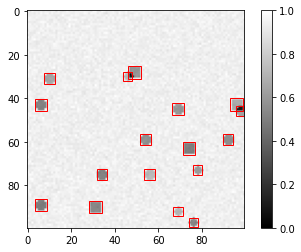

[[13.         72.          2.63290172  2.63290172]
 [83.         98.          2.28328998  2.28328998]
 [38.         42.          2.42571379  2.42571379]
 [79.         41.          2.46019294  2.46019294]
 [64.         93.          2.63291211  2.63291211]
 [37.         13.          2.68496991  2.68496991]
 [65.         26.          2.87324812  2.87324812]
 [12.         26.          2.36588634  2.36588634]
 [19.         35.          2.98776338  2.98776338]
 [28.         82.          2.02971663  2.02971663]
 [98.         15.          2.50229896  2.50229896]
 [49.         80.          2.99101864  2.99101864]
 [73.         40.          2.20299119  2.20299119]
 [52.         77.          2.70829409  2.70829409]
 [52.         81.          2.23104568  2.23104568]
 [13.          4.          2.9151008   2.9151008 ]
 [33.         18.          2.40075705  2.40075705]
 [62.         70.          2.54997193  2.54997193]
 [43.         65.          2.33000289  2.33000289]
 [77.         46.          2.03

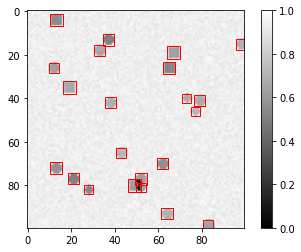

[[24.         16.          2.76494792  2.76494792]
 [69.         16.          2.79428328  2.79428328]
 [38.         56.          2.8109498   2.8109498 ]
 [60.         52.          2.604574    2.604574  ]
 [31.         19.          2.92732828  2.92732828]
 [65.         62.          2.55978615  2.55978615]
 [21.         64.          2.93091979  2.93091979]
 [74.         60.          2.23180491  2.23180491]
 [34.         76.          2.24408758  2.24408758]
 [93.         92.          2.04267811  2.04267811]
 [27.         43.          2.54429604  2.54429604]
 [70.         47.          2.95337662  2.95337662]
 [61.          3.          2.79596182  2.79596182]
 [ 8.         56.          2.32955188  2.32955188]
 [67.         21.          2.70775066  2.70775066]
 [34.          5.          2.04942693  2.04942693]
 [56.         51.          2.78813396  2.78813396]
 [57.         52.          2.69982602  2.69982602]
 [60.         52.          2.18480921  2.18480921]
 [46.         17.          2.23

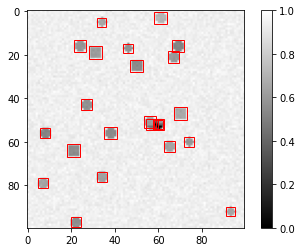

In [11]:
NUMBER_OF_IMAGES = 5

for _ in range(NUMBER_OF_IMAGES):
    particle.update()
    pos = pos.update()
    rad = rad.update()
    
    bboxes = label_func.resolve()

    
    #print(np.array(bboxes))
    image_of_particle = particle.resolve()
    

    
    n = np.shape(bboxes)[0]
    position_of_particles = bboxes[:,0:2]
    #print(position_of_particles)
    radius_of_particles = bboxes[:,2] 
    
    plt.imshow(image_of_particle.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap="gray", vmin = 0)
    plt.colorbar()
    ax = plt.gca()
    for i in range(int(n)):
        rect = plt.Rectangle((position_of_particles[i,0]-radius_of_particles[i],position_of_particles[i,1]-radius_of_particles[i]),2*radius_of_particles[i],2*radius_of_particles[i],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    
    #plt.scatter(position_of_particles[:,0], position_of_particles[:,1], marker='+', edgecolors="r", linewidth=2)
    plt.show()

In [12]:
from deeptrack.models.yolo.yolo import YOLOv3

model = YOLOv3(
    (100, 100, 1),
    1,
)

model.compile(optimizer="adam")

In [13]:
from deeptrack.models.yolo.dataset import YoloDataGenerator

data = particle & bboxes

generator = YoloDataGenerator(
    feature=data,
    input_size=np.array([100]),
    num_class=1,
    label_function=lambda d: np.array(d[1:]),
    batch_size=4,
    min_data_size=100,
    max_data_size=200,
)

generator.anchors = model.anchors

In [14]:
with generator:
    model.fit(generator, epochs=50)

Generating 125 / 100 samples before starting training


IndexError: arrays used as indices must be of integer (or boolean) type